In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set_theme("notebook")

## Decay of vorticity contribution

### Theory

The part of the circulaiton driven by vorticity fluxes (let's call this $C_{\zeta}$) is given by

$$ \partial_t\, \overline{H\vec{u} \cdot \vec{t}}^h = \overline{ \zeta H \vec{u} \cdot \vec{n}}^h  - R\,\overline{\vec{u}\cdot \vec{t}}^h $$

This means that $C_{\zeta}$ decays as $e^{Rt/H}$ if there is no vorticity flux. If there is some small vorticity flux present, with the right sign, $C_{\zeta}$ will decay slower. 

In the following analysis, we see that $C_{\zeta}$ decays a bit slower than with a time scale of $R/H$.

In [34]:
ds = xr.open_dataset("../output/extracted_circ/slope-006_circ.nc")
ds

<xarray.Dataset>
Dimensions:             (depth: 9, time: 3073)
Coordinates:
  * time                (time) float64 0.0 0.125 0.25 ... 383.8 383.9 384.0
  * depth               (depth) int64 100 200 300 400 500 600 700 800 900
Data variables:
    circulation         (depth, time) float64 ...
    linear_estimate     (depth, time) float64 ...
    nonlinear_estimate  (depth, time) float64 ...

In [35]:
ds["vorticity_contribution"] = ds.nonlinear_estimate-ds.linear_estimate
ds

<xarray.Dataset>
Dimensions:                 (depth: 9, time: 3073)
Coordinates:
  * time                    (time) float64 0.0 0.125 0.25 ... 383.8 383.9 384.0
  * depth                   (depth) int64 100 200 300 400 500 600 700 800 900
Data variables:
    circulation             (depth, time) float64 ...
    linear_estimate         (depth, time) float64 ...
    nonlinear_estimate      (depth, time) float64 ...
    vorticity_contribution  (depth, time) float64 0.0 0.0 ... -0.0001786

Text(0, 0.5, 'Vorticity contribution [cm/s]')

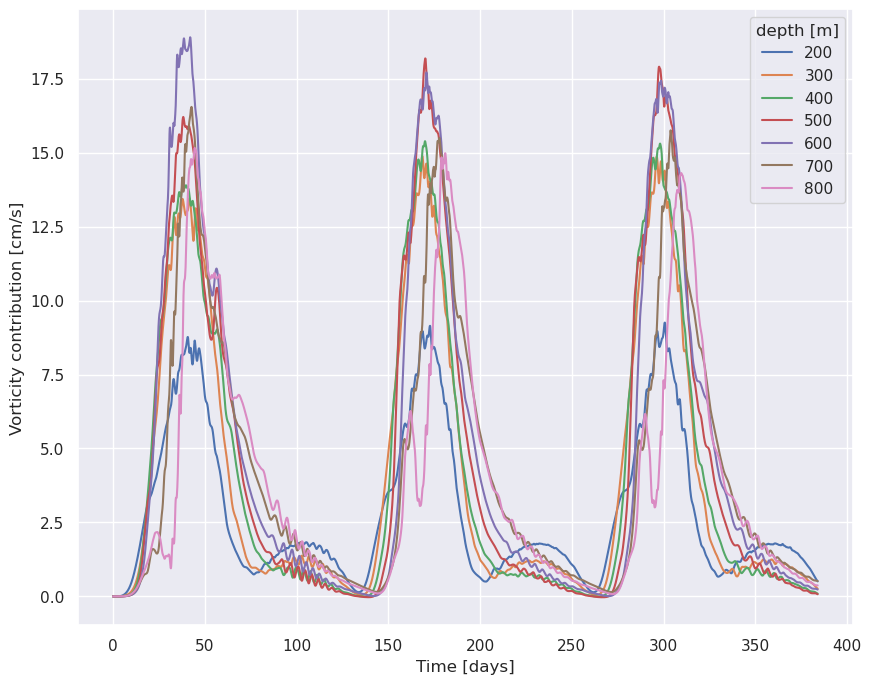

In [36]:
fig, ax = plt.subplots(figsize=(10,8))

x = ds.time
for depth in ds.depth[1:-1]:
    y = ds.sel(depth=depth).vorticity_contribution
    ax.plot(x,y, label=depth.values)    
ax.legend(title="depth [m]")


ax.set_xlabel("Time [days]")
ax.set_ylabel("Vorticity contribution [cm/s]")

Text(0, 0.5, 'Log of Vorticity contribution [cm/s]')

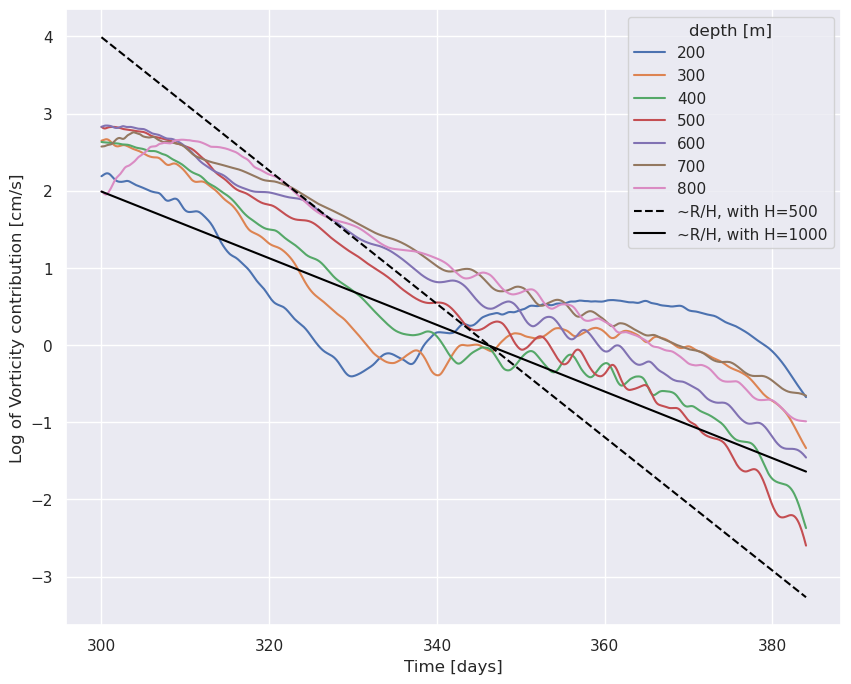

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
dss = ds.sel(time=slice(300,None))
#dss = ds.sel(time=slice(150,250))

R = 5e-4
x = dss.time
xs = x*24*60*60
for depth in dss.depth[1:-1]:
    y = dss.sel(depth=depth).vorticity_contribution
    ax.plot(x,np.log(y), label=depth.values)  
    
    # z = -(R/depth.values)*xs
    # ax.plot(x,z-z[0]+np.log(y[0]))  
ax.legend()

depth = 500
z = -(R/depth)*xs
ax.plot(x,z-z[0]+np.log(y[0])+2, color="black", ls="--", label=f"~R/H, with H={depth}")

depth = 1000
z = -(R/depth)*xs
ax.plot(x,z-z[0]+np.log(y[0]), color="black", label=f"~R/H, with H={depth}")


ax.legend(title="depth [m]")
ax.set_xlabel("Time [days]")
ax.set_ylabel("Log of Vorticity contribution [cm/s]")

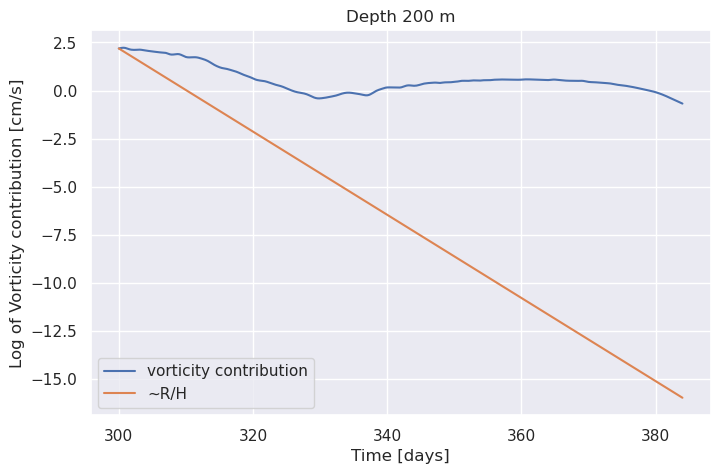

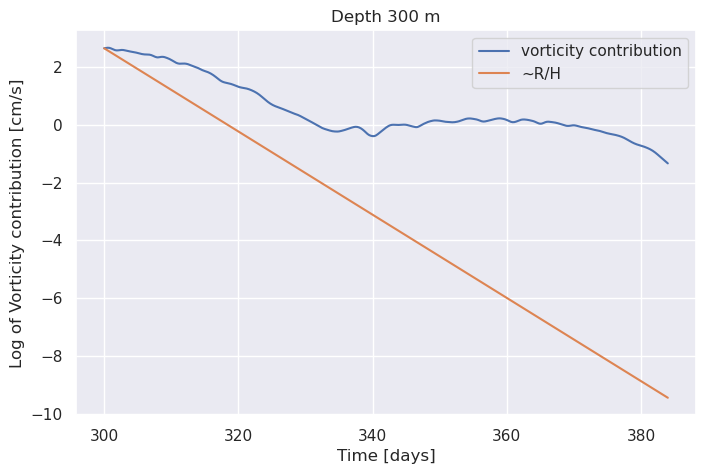

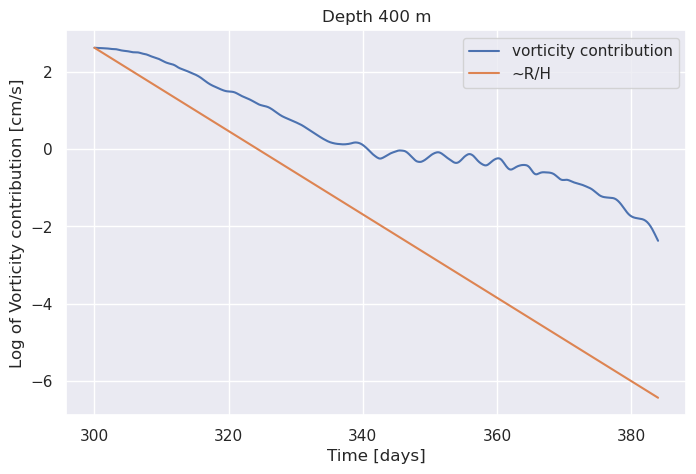

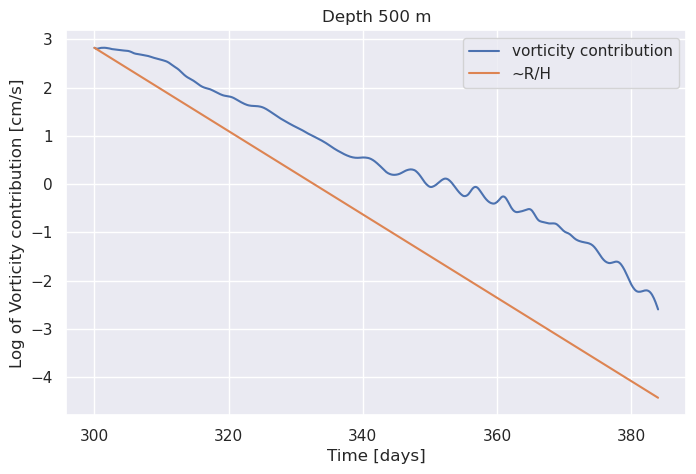

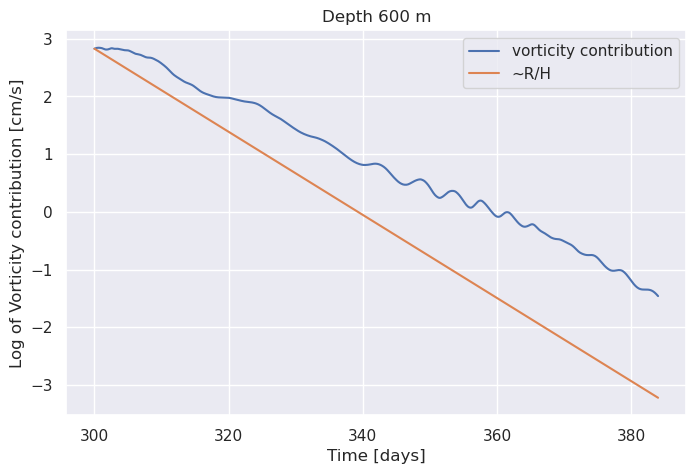

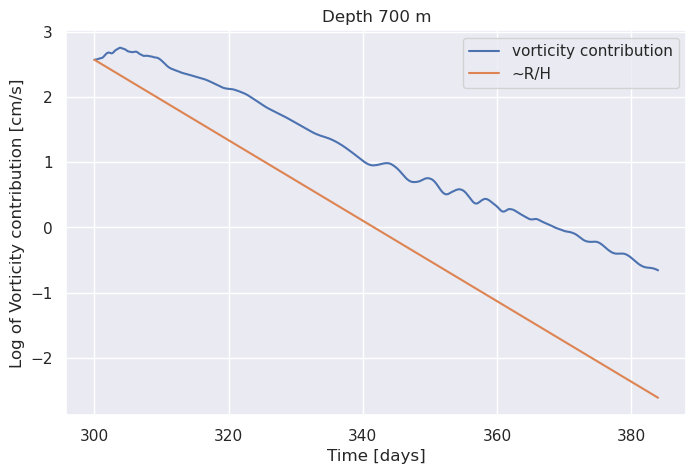

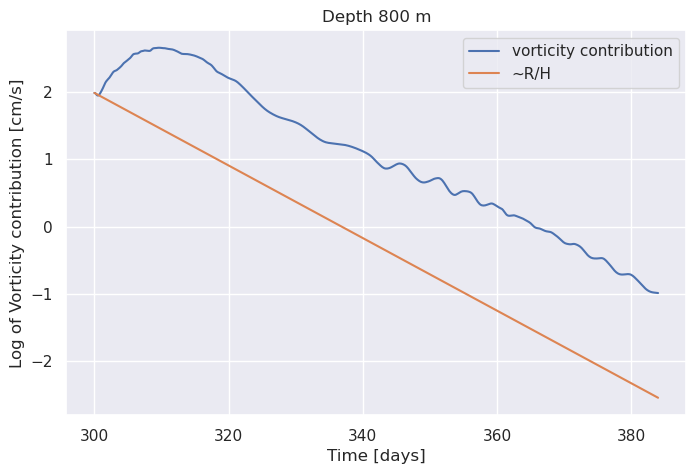

In [38]:
# ser på en og en
for depth in dss.depth[1:-1]:
    fig, ax = plt.subplots(figsize=(8,5))
    y = dss.sel(depth=depth).vorticity_contribution
    ax.plot(x,np.log(y), label="vorticity contribution")  
    
    z = -(R/depth.values)*xs
    ax.plot(x,z-z[0]+np.log(y[0]), label="~R/H") 
    
    ax.set_title(f"Depth {depth.values} m")
    
    ax.legend()
    ax.set_xlabel("Time [days]")
    ax.set_ylabel("Log of Vorticity contribution [cm/s]")

## Decay of EKE

### Theory
Instead of directly diagnosing the decay of the vorticity contribution, which is well defined by the momentum budget for a depth contour, we can look at the the decay of what we believe is the driving mechanism *behind* the vorticity flox - the eddy field.

This is less anchorend in the equations we work with, so it is less obvious which quantity to look at. But, one candidate, is to look at the eddy kinetick energy, maybe scaled by the mean kinetic energy. 

Here, EKE and MKE is calculated using a Reynolds decomposition in time. An alternative could be to calculate the mean field not by smoothing in time, but by using the linear model somehow to calculate the linear velocity, and from that the MKE. 

From the following 

In [39]:
dse = xr.open_dataset("../output/for_plotting/eke_mke_slope-006.nc")
dse

<xarray.Dataset>
Dimensions:  (time: 3073)
Coordinates:
    zC       float64 ...
    zF       float64 ...
  * time     (time) float64 0.0 0.125 0.25 0.375 0.5 ... 383.6 383.8 383.9 384.0
Data variables:
    eke      (time) float64 ...
    mke      (time) float64 ...
Attributes:
    smoothing window in days:  5.0

Text(0.5, 0, 'Time [days]')

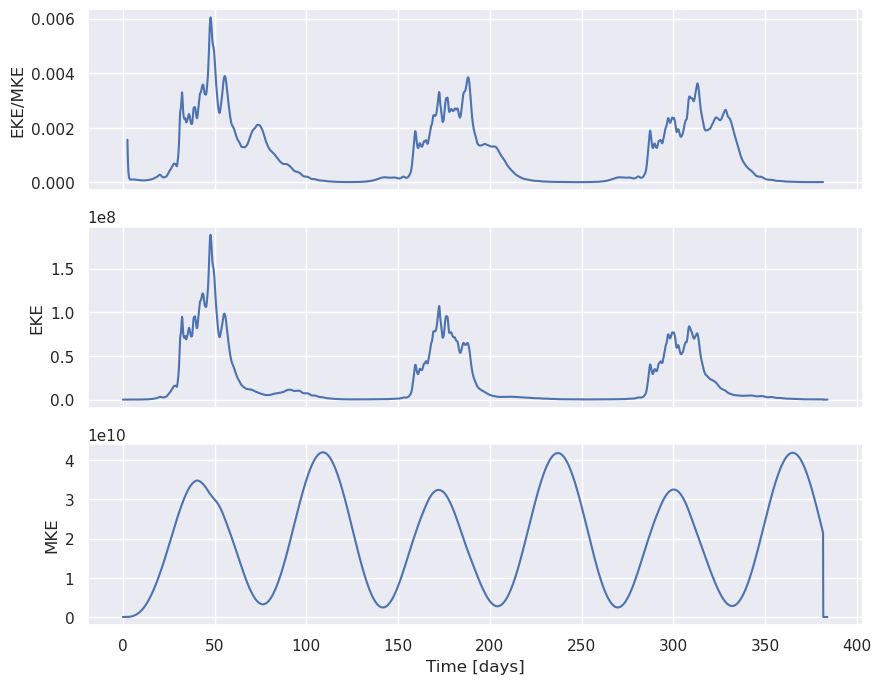

In [40]:
fig, [ax0, ax1, ax2] = plt.subplots(nrows=3, figsize=(10,8), sharex=True)
ax0.plot(dse.time, dse.eke/dse.mke)
ax0.set_ylabel("EKE/MKE")
ax1.plot(dse.time, dse.eke)
ax1.set_ylabel("EKE")
ax2.plot(dse.time, dse.mke)
ax2.set_ylabel("MKE")

ax2.set_xlabel("Time [days]")

/itf-fi-ml/home/alsjur/.conda/envs/general/lib/python3.12/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Text(0.5, 0, 'Time [days]')

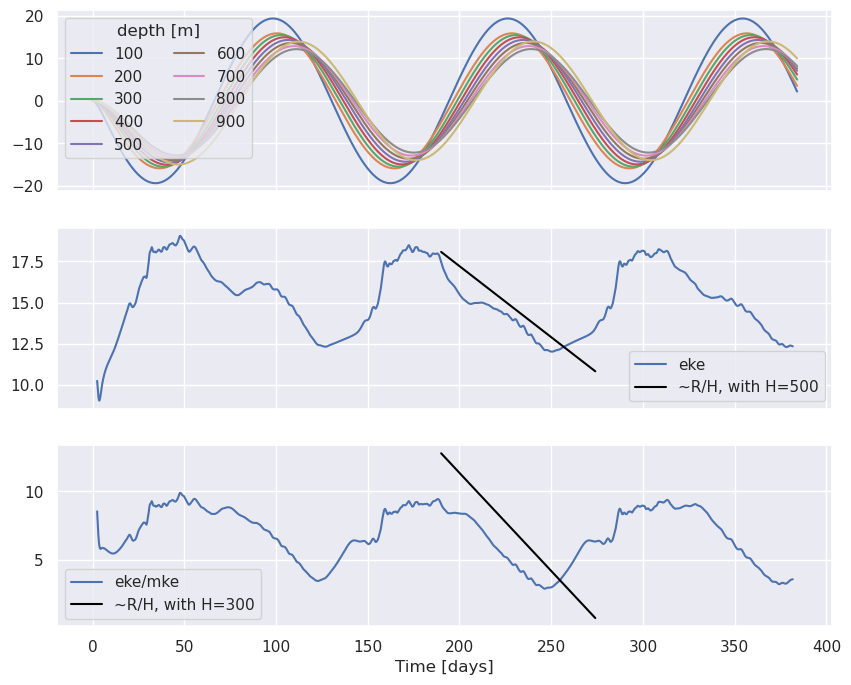

In [45]:
fig, [ax0, ax1, ax2] = plt.subplots(nrows=3, figsize=(10,8), sharex=True)


xx = ds.time
for depth in ds.depth:
    y = ds.sel(depth=depth).linear_estimate
    ax0.plot(xx,y, label=depth.values)    
ax0.legend(title="depth [m]", ncols=2)

ax1.plot(dse.time, np.log(dse.eke), label="eke")
ax2.plot(dse.time, np.log(dse.eke/dse.mke)+15, label="eke/mke")

depth = 500
z = -(R/depth)*xs
ax1.plot(x-110,z+44, color="black", label = f"~R/H, with H={depth}")
ax1.legend()

depth = 300
z = -(R/depth)*xs
ax2.plot(x-110,z+56, color="black", label = f"~R/H, with H={depth}")
ax2.legend()

ax2.set_xlabel("Time [days]")

/itf-fi-ml/home/alsjur/.conda/envs/general/lib/python3.12/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Text(0.5, 0, 'Time [days]')

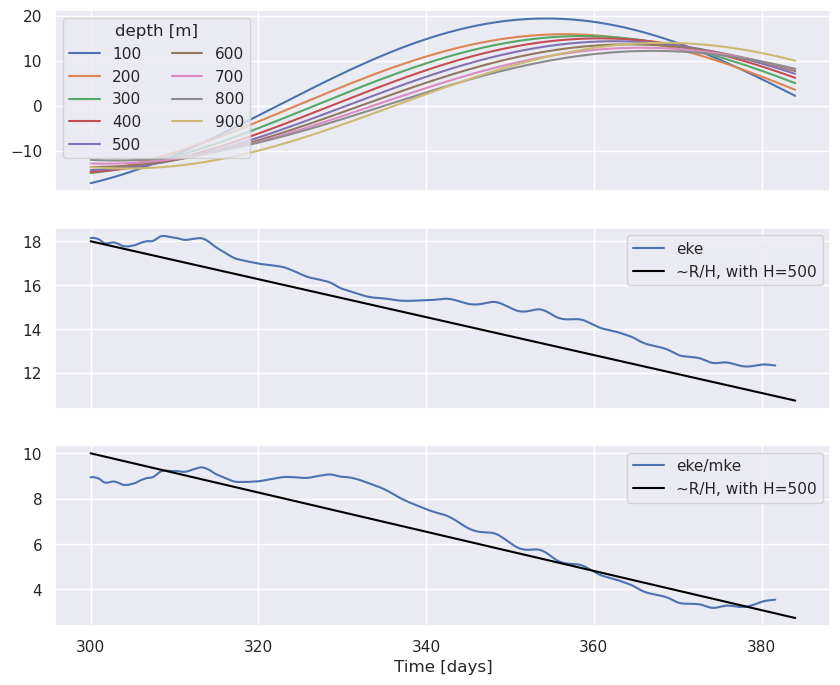

In [52]:
fig, [ax0, ax1, ax2] = plt.subplots(nrows=3, figsize=(10,8), sharex=True)

dsee = dse.sel(time=slice(300,None))

xx = dss.time
for depth in ds.depth:
    y = dss.sel(depth=depth).linear_estimate
    ax0.plot(xx,y, label=depth.values)    
ax0.legend(title="depth [m]", ncols=2)

ax1.plot(dsee.time, np.log(dsee.eke), label="eke")
ax2.plot(dsee.time, np.log(dsee.eke/dsee.mke)+15, label="eke/mke")

depth = 500
z = -(R/depth)*xs
ax1.plot(x,z-z[0]+18, color="black", label = f"~R/H, with H={depth}")
ax1.legend()

depth = 500
z = -(R/depth)*xs
ax2.plot(x,z-z[0]+10, color="black", label = f"~R/H, with H={depth}")
ax2.legend()

ax2.set_xlabel("Time [days]")